In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from IPython.core.display import display, HTML

def bar_labels(axes, rotation=0, location="edge"):
    for container in axes.containers:
        axes.bar_label(container, rotation=rotation, label_type=location)
    axes.set_yticklabels(())
    axes.set_xlabel("")
    axes.set_ylabel("")
    
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
etc = ExtraTreesClassifier()
lgr = LogisticRegression()
svc = SVC()
xgb = XGBClassifier()
lgb = LGBMClassifier(verbose=-100)

models = [rfc, abc, gbc, etc,
         lgr, svc, xgb, lgb]

names = ["Random Forest", "Ada Boost", "Gradient Boosting", "Extra Trees",
        "Logistic Regression", "Support Vector Machine", "XGBoost", "LightGBM"]
    
def training():
    scores, reports, cms = [], dict(), dict()
    
    for i, j in zip(models, names):
        i.fit(x_train, y_train)
        pred = i.predict(x_test)
        scores += [accuracy_score(pred, y_test)*100]
        reports[j] = classification_report(pred, y_test)
        cms[j] = confusion_matrix(pred, y_test)
        
    dd = pd.DataFrame({"score": scores}, index=names)
    dd = dd.sort_values("score", ascending=False)
    dd["score"] = round(dd["score"], 2)
    
    fig, axes = plt.subplots()
    dd["score"].plot(kind="bar", ax=axes)
    bar_labels(axes)
    plt.show()
    
    index = 0
    
    for _ in range(2):
        fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
        for i in range(4):
            sns.heatmap(cms[dd.index[index]], annot=True, fmt='d', ax=axes[i])
            axes[i].set_title("{}: {}%".format(dd.index[index], dd.iloc[index, 0]))
            index += 1
        plt.tight_layout()
        plt.show()
        
    for i in dd.index:
        print("*"*30)
        print(i)
        print(reports[i])
        
        print("\n\n")

# Dataset exploration

In [2]:
df = pd.read_csv("/kaggle/input/predict-students-dropout-and-academic-success/Predict Student Dropout and Academic Success.csv", sep=';')

In [3]:
pd.set_option("display.max_columns", None)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
df.shape

(4424, 37)

In [5]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
df.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance\t                        2
Previous qualification                             17
Previous qualification (grade)                    101
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder          

# Dropout rates tendencies

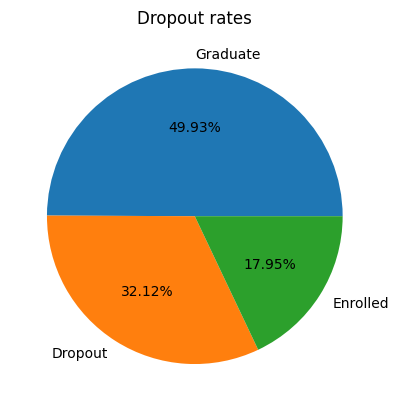

In [7]:
fig, axes = plt.subplots()
df["Target"].value_counts().plot(kind="pie", ax=axes, autopct="%0.2f%%")
axes.set_ylabel("")
axes.set_xlabel("")
axes.set_title("Dropout rates")
plt.show()

In [8]:
cats = [i for i in df.columns if df[i].nunique() <= 2]
nums = ["Age at enrollment"] + [i for i in df.columns if df[i].nunique() > 46]

# Categorical students habits

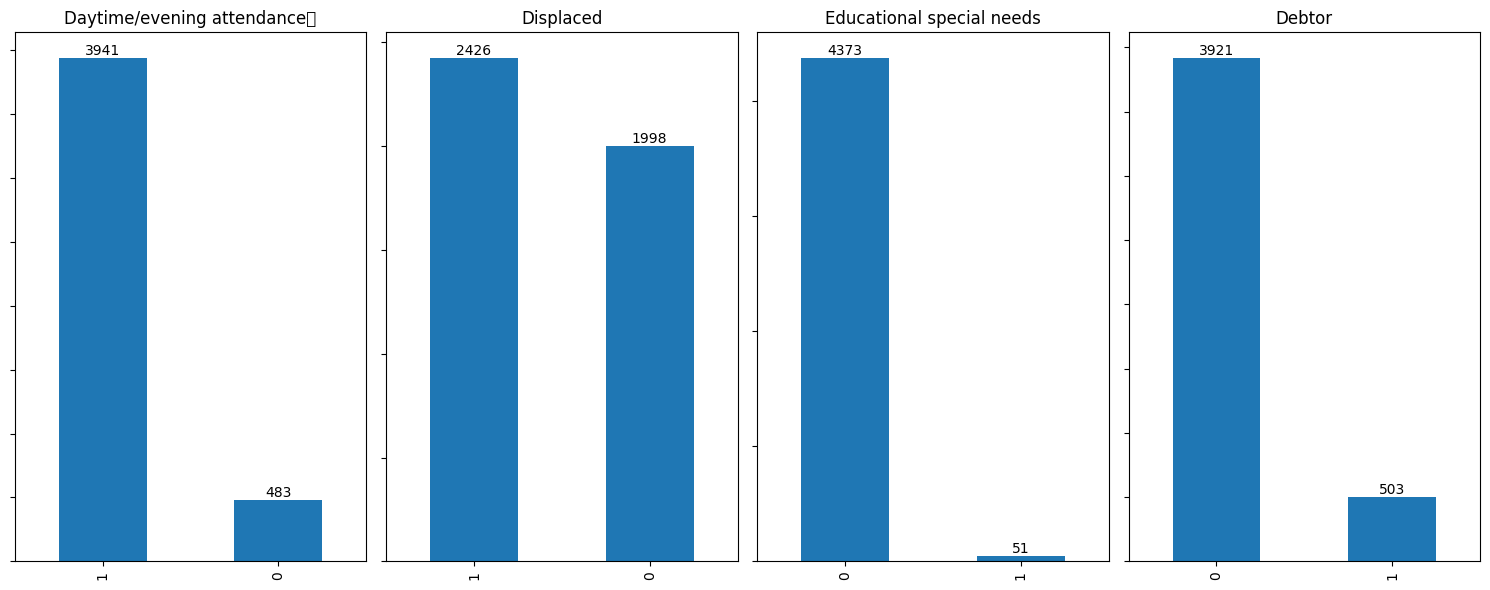

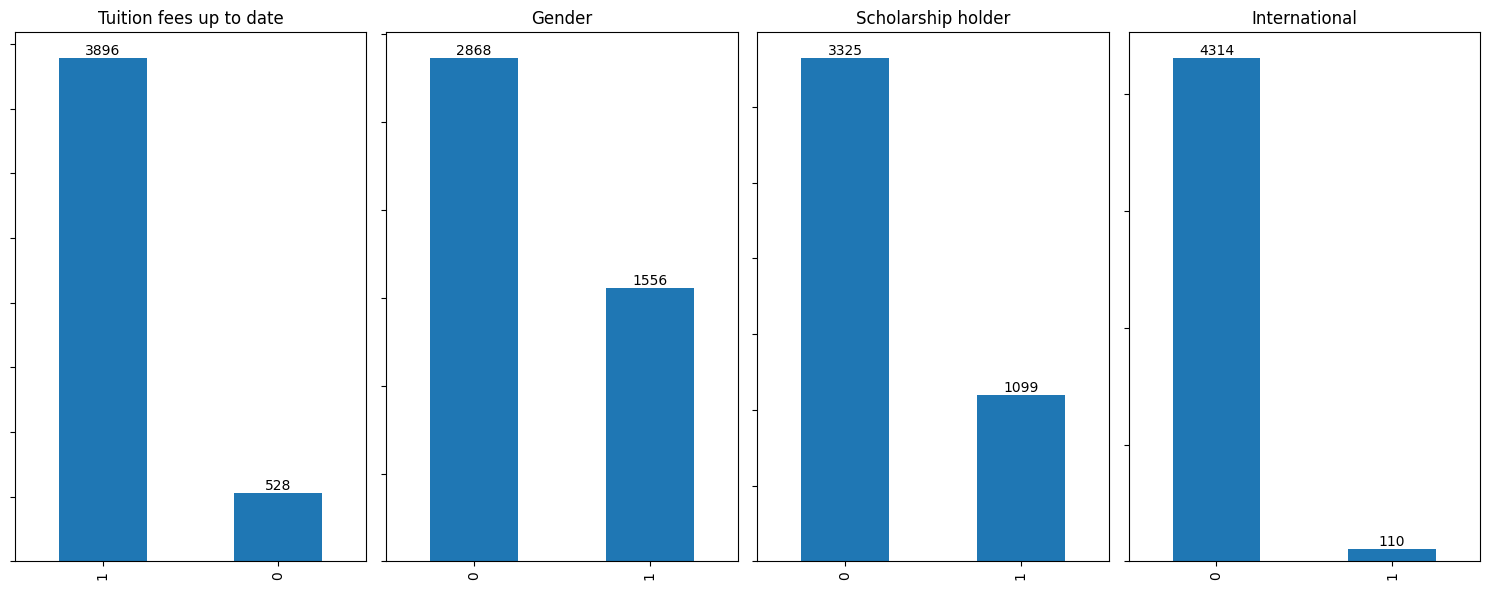

In [9]:
index = 0

for _ in range(2):
    fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
    for i in range(4):
        df[cats[index]].value_counts().plot(kind="bar", ax=axes[i])
        axes[i].set_title(cats[index])
        bar_labels(axes[i])
        index += 1
    plt.tight_layout()
    plt.show()

# Influence of students personal differences on dropout rates

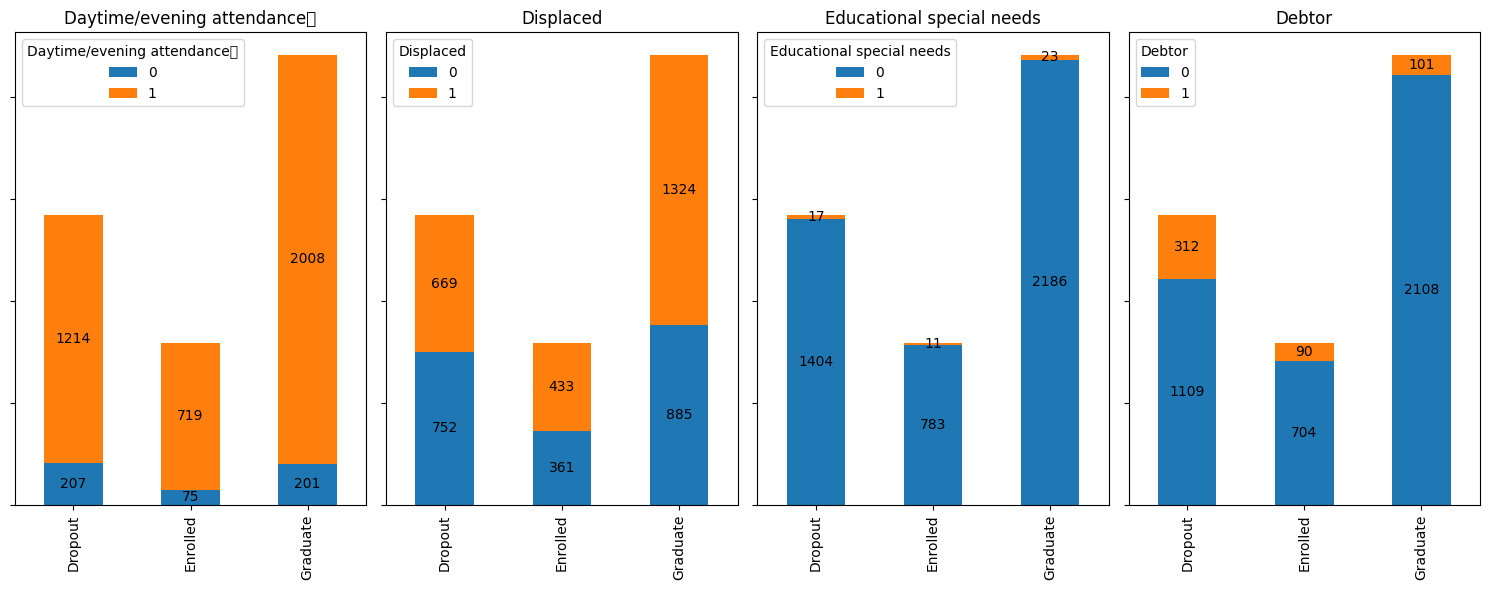

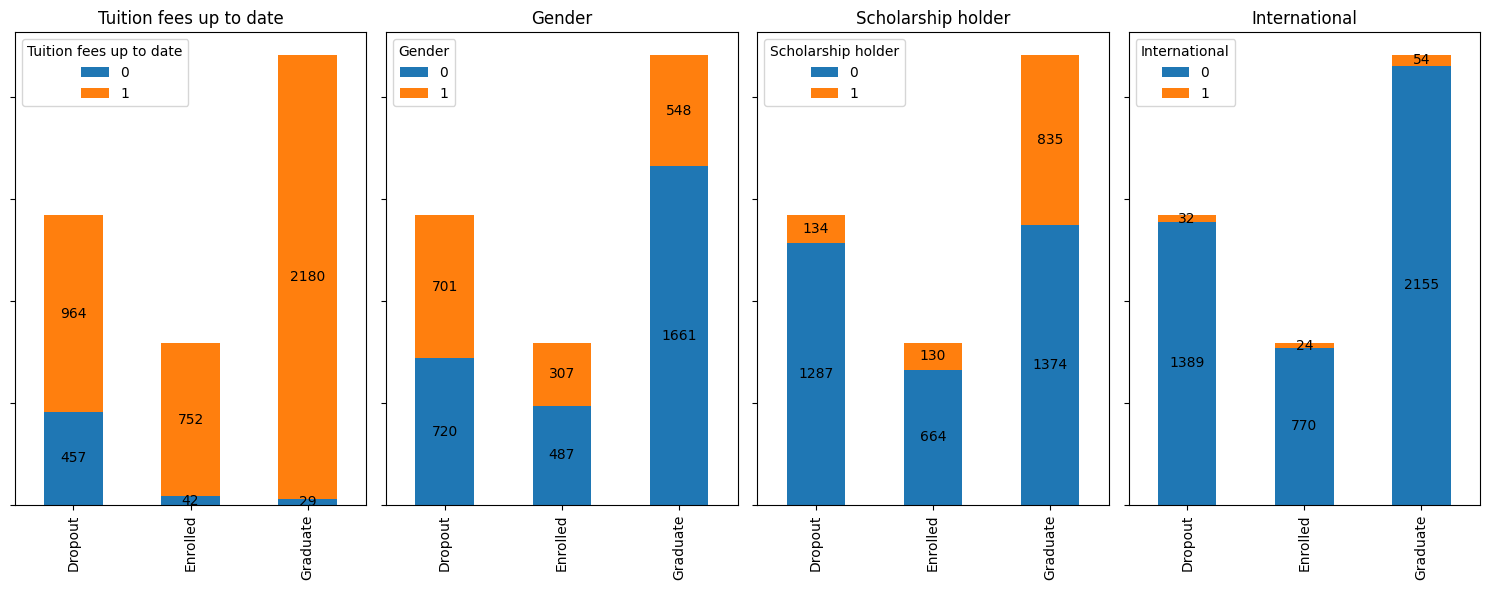

In [10]:
grouped = df.groupby("Target")

index = 0

for _ in range(2):
    fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
    for i in range(4):
        grouped[cats[index]].value_counts().unstack().plot(kind="bar", ax=axes[i], stacked=True)
        axes[i].set_title(cats[index])
        bar_labels(axes[i], 0, "center")
        index += 1
    plt.tight_layout()
    plt.show()

# Age of enrollment, grades distribution

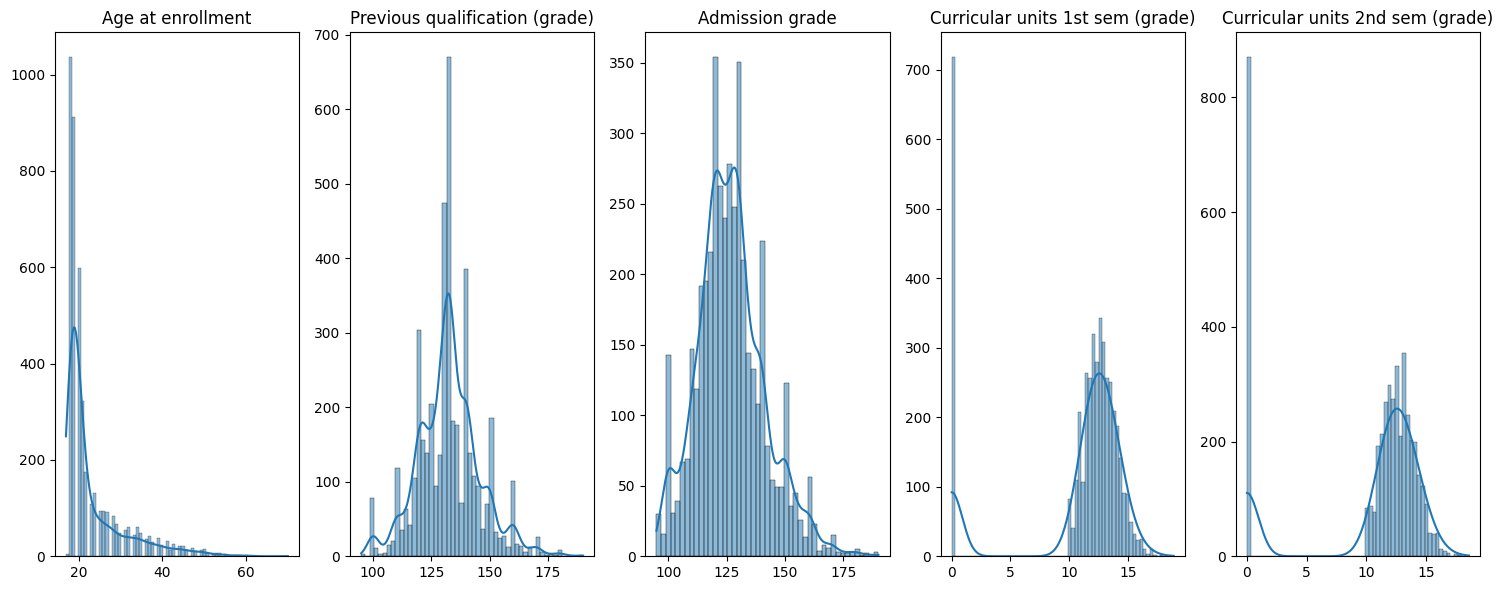

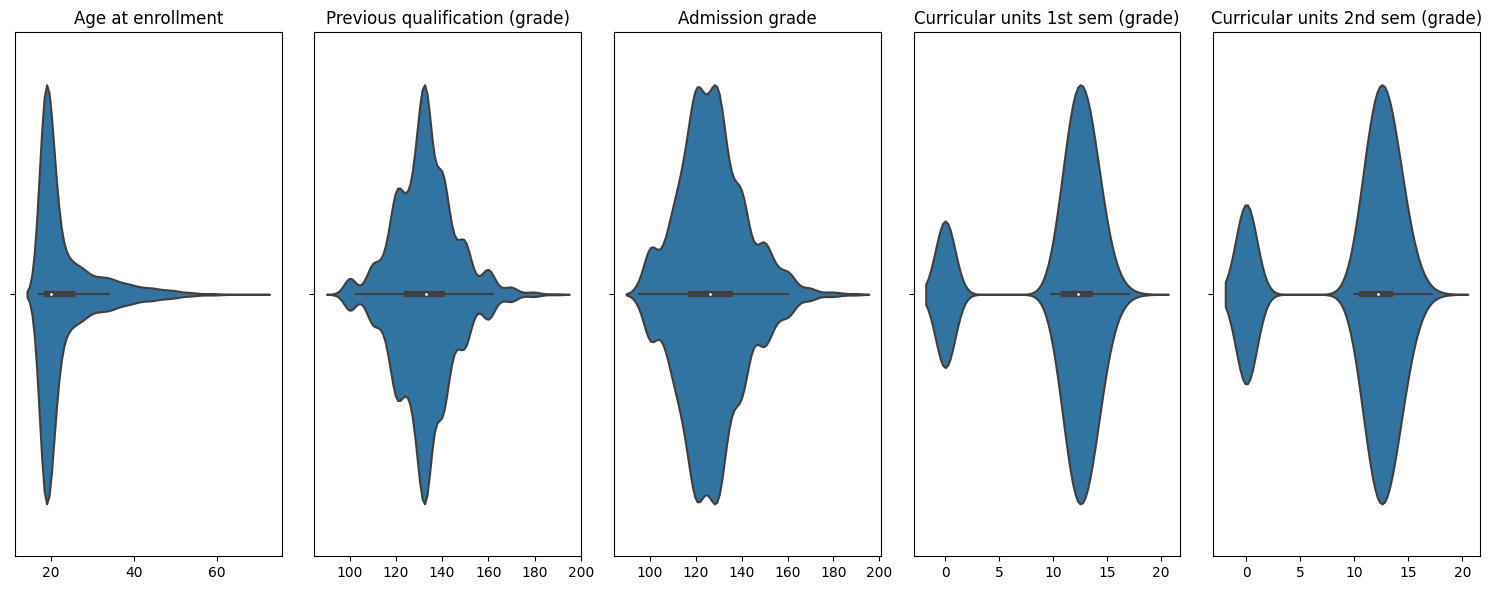

In [11]:
fig, axes = plt.subplots(ncols=5, figsize=(15, 6))

for i, j in enumerate(nums):
    sns.histplot(df, x=j, kde=True, ax=axes[i])
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")
    axes[i].set_title(j)
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(ncols=5, figsize=(15, 6))

for i, j in enumerate(nums):
    sns.violinplot(df, x=j, ax=axes[i])
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")
    axes[i].set_title(j)
plt.tight_layout()
plt.show()

# General data distirbution of enrollment ages and grades among students status

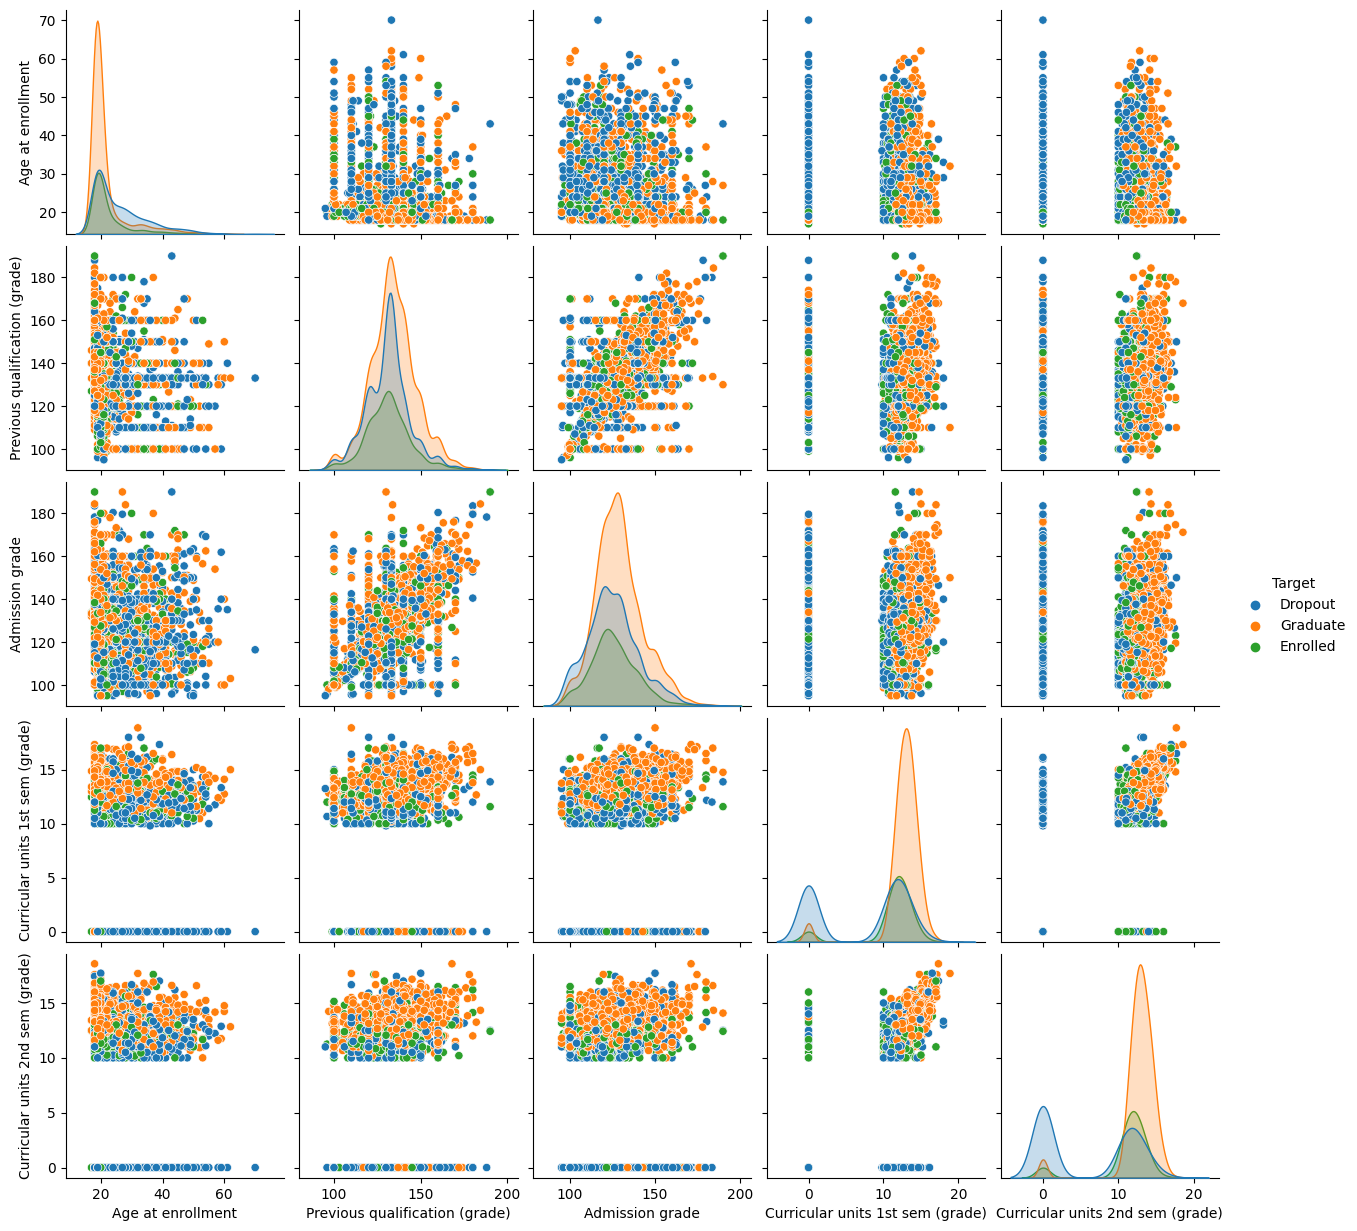

In [12]:
sns.pairplot(df, vars=nums, hue="Target")
plt.show()

# Average age at enrollment and grades for each students status and their distribution

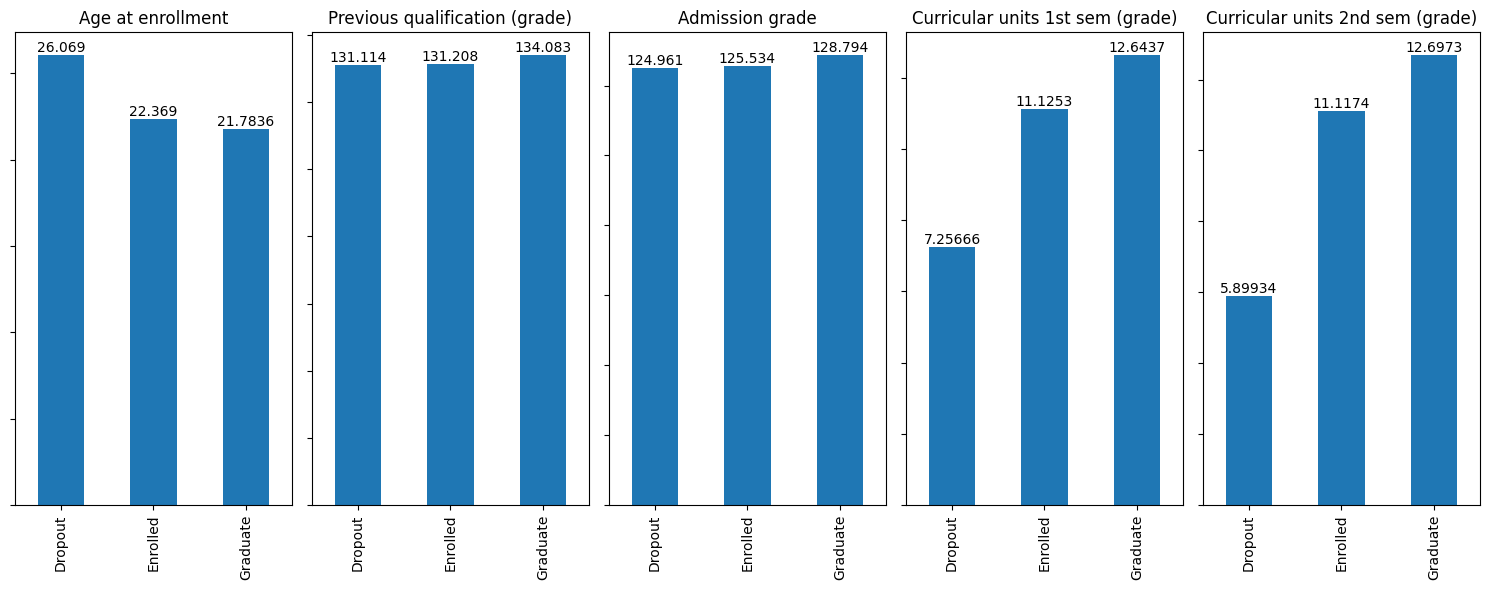

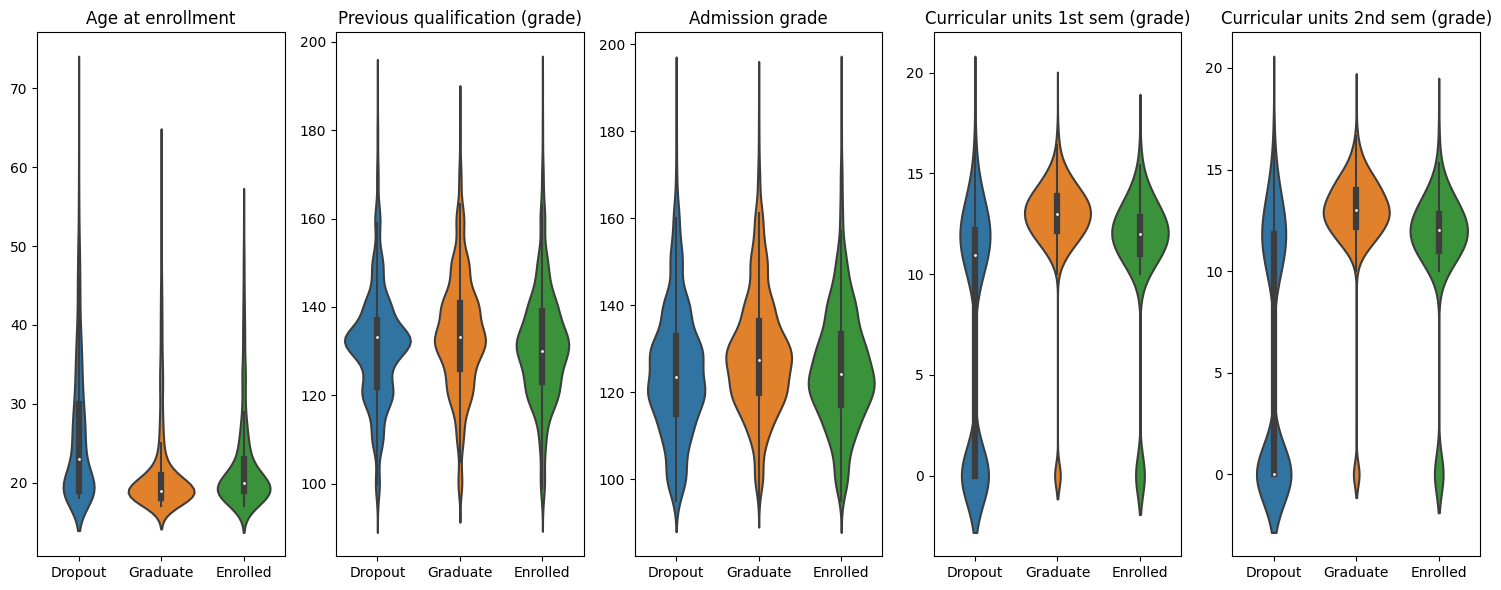

In [13]:
fig, axes = plt.subplots(ncols=5, figsize=(15, 6))

for i, j in enumerate(nums):
    grouped[j].mean().plot(kind="bar", ax=axes[i])
    bar_labels(axes[i])
    axes[i].set_title(j)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(ncols=5, figsize=(15, 6))

for i, j in enumerate(nums):
    sns.violinplot(df, x="Target", y=j, ax=axes[i])
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")
    axes[i].set_title(j)
plt.tight_layout()
plt.show()

# Classification models performance evaluation, assessment and comparison

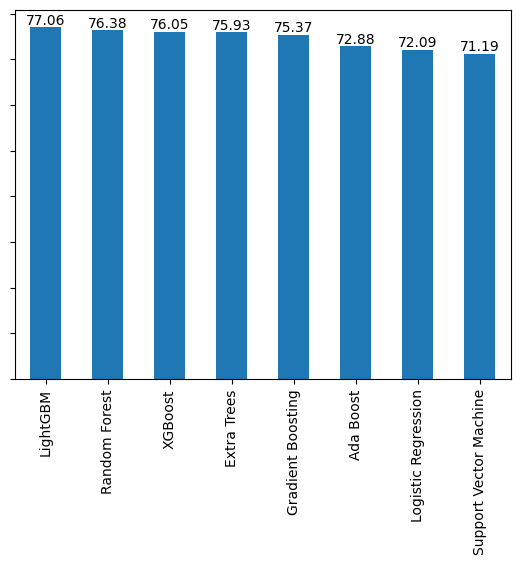

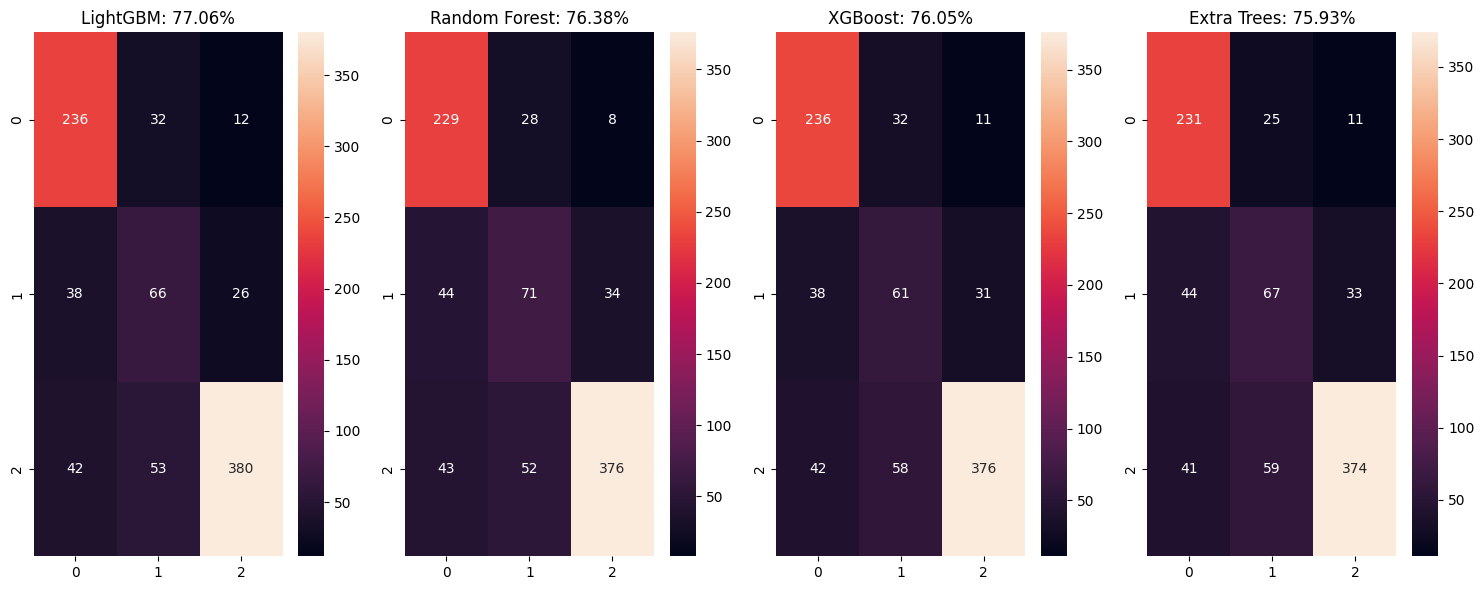

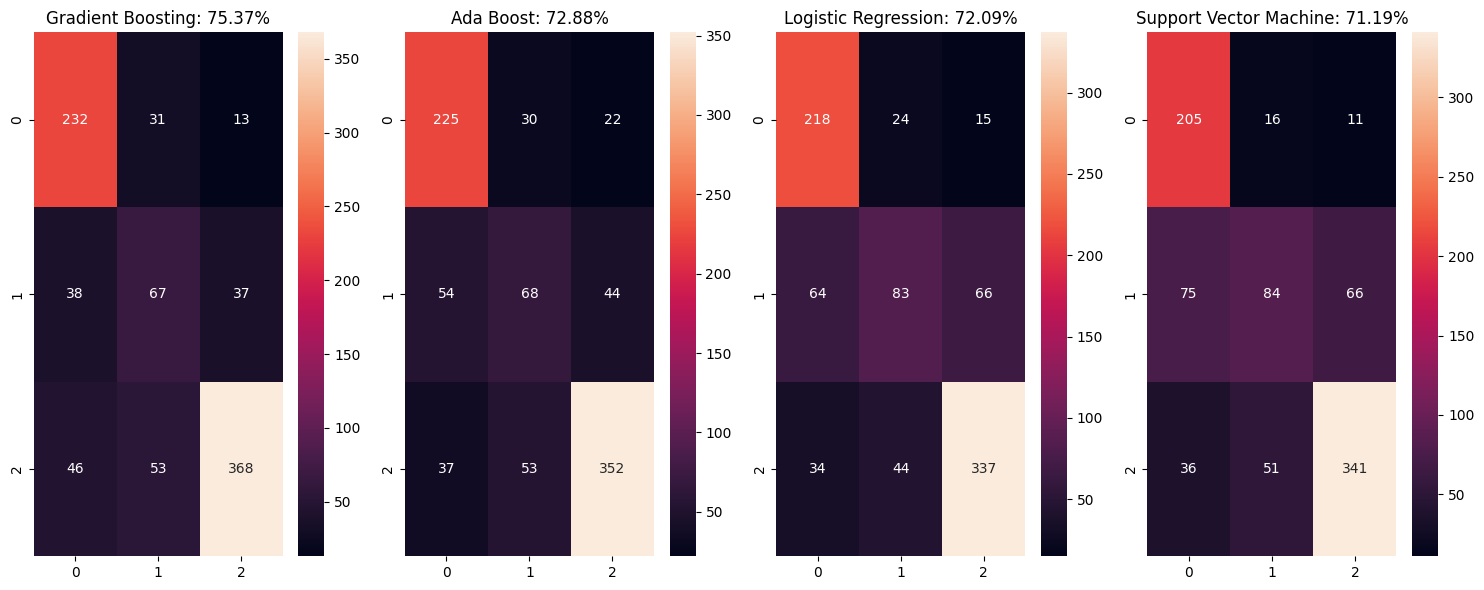

******************************
LightGBM
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       280
           1       0.44      0.51      0.47       130
           2       0.91      0.80      0.85       475

    accuracy                           0.77       885
   macro avg       0.70      0.72      0.70       885
weighted avg       0.79      0.77      0.78       885




******************************
Random Forest
              precision    recall  f1-score   support

           0       0.72      0.86      0.79       265
           1       0.47      0.48      0.47       149
           2       0.90      0.80      0.85       471

    accuracy                           0.76       885
   macro avg       0.70      0.71      0.70       885
weighted avg       0.77      0.76      0.77       885




******************************
XGBoost
              precision    recall  f1-score   support

           0       0.75      0.85      0.79       279

In [14]:
le = LabelEncoder()
df["Target"] = le.fit_transform(df["Target"].values)


x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

scaler = MinMaxScaler()

x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

from imblearn.over_sampling import SMOTE

smote = SMOTE()

x_train, y_train = smote.fit_resample(x_train, y_train)

training()